In [7]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Amazon_Instant_Video.json.gz')

In [8]:
df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"


In [9]:
import nltk
import re
from nltk.corpus import stopwords

def clean_text(text):
    return re.sub(r'[^\w\s]','',text).lower()

stop = stopwords.words('english')

In [10]:
df['cleanText'] = df['reviewText'].apply(clean_text)
df['cleanText'] = df['cleanText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print(df['cleanText'])

0        big expectations love english tv particular in...
1        highly recommend series must anyone yearning w...
2        one real snoozer dont believe anything read he...
3        mysteries interesting tension robson tall blon...
4        show always excellent far british crime myster...
                               ...                        
37121    love books show amazing far pleased see book c...
37122    strain potential excellent summer horror serie...
37123    im real sure rate series yet since first episo...
37124    episode one far makes want watch reminds salem...
37125    watched pilot guess ive seen many horror movie...
Name: cleanText, Length: 37126, dtype: object


In [11]:
from textblob import TextBlob
def get_polarity(text):
    analysis = TextBlob(text)
    if text !='':
        result = analysis.sentiment.polarity
        return result

In [12]:
df['polarity'] = df['cleanText'].apply(get_polarity)
df['polarity']

0       -0.066667
1       -0.046667
2       -0.400000
3        0.300000
4        0.197115
           ...   
37121    0.425000
37122    0.088893
37123    0.219608
37124    0.333333
37125   -0.250000
Name: polarity, Length: 37126, dtype: float64

In [13]:
def x_range(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [14]:
df['result'] = df['polarity'].apply(x_range)

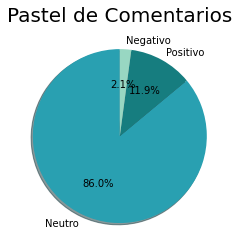

In [15]:
import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1', '#167D7F', '#98D7C2']
plt.pie(df['result'].value_counts(), labels = labels, colors = colors, 
        autopct = '%1.1f%%', shadow =True, startangle = 90)
plt.title('Pastel de Comentarios', fontsize = 20)
plt.show()

In [16]:
from wordcloud import WordCloud
text = ' '.join(df.cleanText)

In [17]:
wordcloud = WordCloud(
    width = 1024, 
    height = 800, 
    colormap = 'Blues', 
    min_font_size = 14).generate(text)

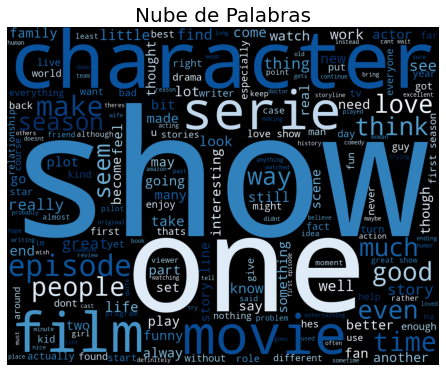

In [18]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title('Nube de Palabras', fontsize = 20)
plt.show()

#Clustering con el Método K-Means

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37126 entries, 0 to 37125
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      37126 non-null  object 
 1   asin            37126 non-null  object 
 2   reviewerName    36797 non-null  object 
 3   helpful         37126 non-null  object 
 4   reviewText      37126 non-null  object 
 5   overall         37126 non-null  float64
 6   summary         37126 non-null  object 
 7   unixReviewTime  37126 non-null  int64  
 8   reviewTime      37126 non-null  object 
 9   cleanText       37126 non-null  object 
 10  polarity        37125 non-null  float64
 11  result          37126 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.5+ MB


In [20]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,cleanText,polarity,result
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014",big expectations love english tv particular in...,-0.066667,-1
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012",highly recommend series must anyone yearning w...,-0.046667,-1
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013",one real snoozer dont believe anything read he...,-0.400000,-1
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013",mysteries interesting tension robson tall blon...,0.300000,1
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009",show always excellent far british crime myster...,0.197115,1


c:\users\toshiba\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\toshiba\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


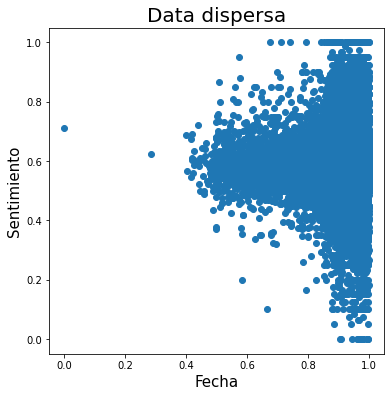

In [51]:
#from datetime import datetime
def convertDate(x):
    return int(x)#datetime.fromtimestamp(x).strftime('%Y')#('%Y%m%d')

df['date'] = df['unixReviewTime'].apply(convertDate)

df_variables = df[['polarity', 'date']] 

df_variables.dropna(subset = ["polarity"], inplace=True)
df_variables.dropna(subset = ["date"], inplace=True)

df_norm = (df_variables-df_variables.min())/(df_variables.max()-df_variables.min())

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Fecha', fontsize = 15)
ax.set_ylabel('Sentimiento', fontsize = 15)
ax.set_title('Data dispersa', fontsize = 20)

ax.scatter(df_norm["date"],df_norm["polarity"])
plt.show()


In [52]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_norm) #Aplico K-means a la base de datos
    wcss.append(kmeans.inertia_)

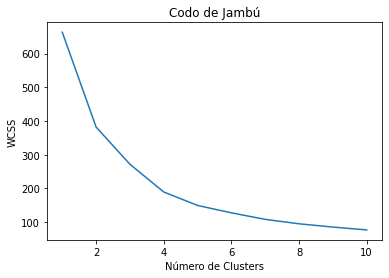

In [53]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS") #WCSS. Es un indicador de que tan similares son los individuos dentro de los clusters
plt.show()

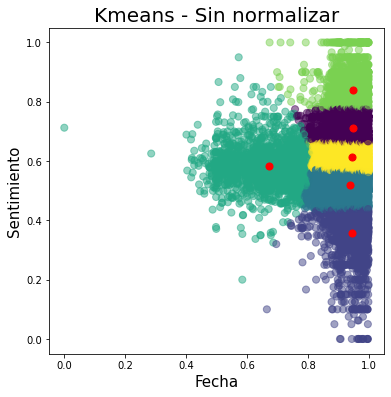

In [54]:
kmeans = KMeans(n_clusters = 6).fit(df_norm)
centroides = kmeans.cluster_centers_

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Fecha', fontsize = 15)
ax.set_ylabel('Sentimiento', fontsize = 15)
ax.set_title('Kmeans - Sin normalizar', fontsize = 20)

ax.scatter(df_norm["date"], df_norm["polarity"],c=kmeans.labels_.astype(float),s=50,alpha=0.5)
ax.scatter(centroides[:,1],centroides[:,0],c='red',s=50)

plt.show()